In [1]:
import matplotlib.pyplot as plt
import pywt
import numpy as np

In [2]:
t_n = 1
N = 1000 
T = t_n/N    #sampling period
fs = 1 / T
#number of sample points for 1 second
t1 = np.linspace(0, t_n, num=N) #time array
t2 = np.linspace(0, t_n/4, num=int(N/4))
pi = np.pi

frequencies = [10, 30, 60, 90]
sig1_1, sig2_1 = 1 * np.sin(2*pi*frequencies[0]*t1), np.sin(2*pi*frequencies[0]*t2)
sig1_2, sig2_2 = 2 * np.sin(2*pi*frequencies[1]*t1), np.sin(2*pi*frequencies[1]*t2)
sig1_3, sig2_3 = 3 * np.sin(2*pi*frequencies[2]*t1), np.sin(2*pi*frequencies[2]*t2)
sig1_4, sig2_4 = 4 * np.sin(2*pi*frequencies[3]*t1), np.sin(2*pi*frequencies[3]*t2)
#generate signal
signal1 = sig1_1 + sig1_2 + sig1_3 + sig1_4
signal2 = np.concatenate([sig2_1, sig2_2, sig2_3, sig2_4])

In [3]:
coeffs = pywt.wavedec(signal1, 'db2', level = 8)
reconstructed_signal = pywt.waverec(coeffs, 'db2')

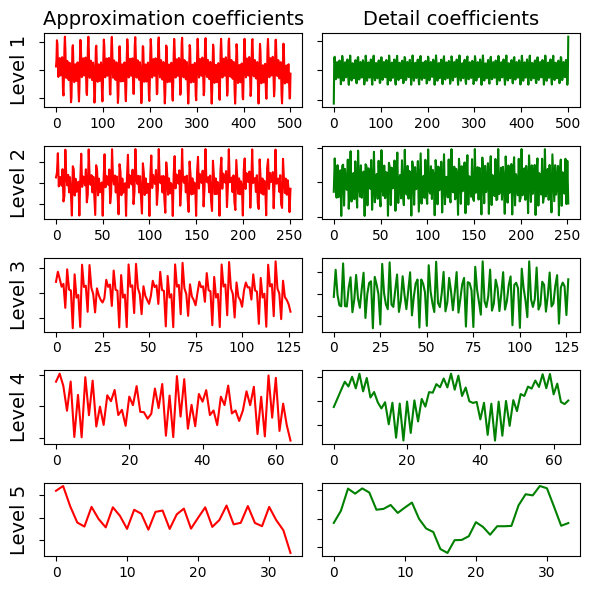

array([ -1.53976291,   2.73932577,  10.63502814,   8.84771091,
        10.70831134,   9.24501718,   3.1274997 ,   3.43101843,
         4.81658881,   1.99354063,   3.89537791,   5.67225974,
        -0.11621317,  -3.55091399,  -4.78692021, -10.8498023 ,
       -12.22703149,  -7.69730431,  -7.60919192,  -6.28422731,
        -1.29315785,  -2.98308585,  -5.75014998,  -2.73004709,
        -2.74239788,  -2.61005412,   4.67605788,   8.63812199,
         8.23370258,  11.55953063,  10.75398515,   4.16624094,
        -2.56600128,  -1.61597349])

In [4]:
fig, axarr = plt.subplots(nrows=5, ncols=2, figsize=(6,6))
for ii in range(5):
    (signal1, coeffs) = pywt.dwt(signal1, 'db2')
    axarr[ii, 0].plot(signal1, 'r')
    axarr[ii, 1].plot(coeffs, 'g')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
plt.tight_layout()
plt.show()

coeffs

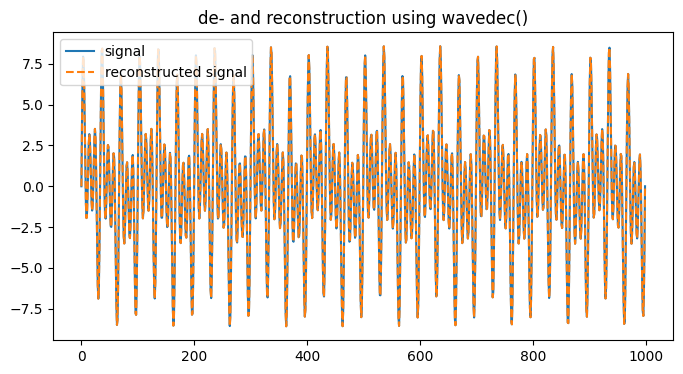

In [7]:
fig, ax = plt.subplots(figsize=(8,4))
signal1 = sig1_1 + sig1_2 + sig1_3 + sig1_4
ax.plot(signal1[:1000], label='signal')
ax.plot(reconstructed_signal[:1000], label='reconstructed signal', linestyle='--')
ax.legend(loc='upper left')
ax.set_title('de- and reconstruction using wavedec()')
plt.show()